# Darion Pescada

## Research question/interests

How have the prices of games changed over the years?


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Milestone 3
#Task 1

dfr = pd.read_csv('../data/raw/steam.csv')

dfp = dfr.copy().drop(['name', 'genres','appid', 'english', 'developer', 'publisher', 'required_age', 'platforms', 'achievements', 'categories', 
'steamspy_tags', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners'], axis=1)

dfp['release_date'] = [int(i.split('-')[0]) for i in dfp['release_date']]

print("Shape: ", dfp.shape)
display(dfp.head(10))
display(dfp.describe(include='float64'))
print("year: game_count:")
dfp['release_date'].value_counts()

Shape:  (27075, 2)


,release_date,price
0,2000,7.19
1,1999,3.99
2,2003,3.99
3,2001,3.99
4,1999,3.99
5,2000,3.99
6,1998,7.19
7,2004,7.19
8,2001,3.99
9,2004,7.19


,price
count,27075.000000
mean,6.078193
std,7.874922
min,0.000000
25%,1.690000
50%,3.990000
75%,7.190000
max,421.990000


year: game_count:


2018    8160
2017    6357
2016    4361
2015    2597
2019    2213
2014    1555
2013     418
2012     320
2009     305
2011     239
2010     238
2008     145
2007      93
2006      48
2005       6
2004       6
2001       4
2003       3
2000       2
1999       2
2002       1
1998       1
1997       1
Name: release_date, dtype: int64

The max price is unreasonably high and the min is zero which could greatly influence the outcome of the data such as the average price so these games should not be included in the analysis.  
There is insufficient data from before 2006 that should also not be accounted for.   
The amount of games released each year increases dramatically after 2005 which may affect the average prices and other things.  
To properly analyze this dataset and answer my research question, I will have to rework it into a new dataframe that shows average price of games, most expensive game, least expensive game, etc., for each of the years.
I cannot observe anything else or create anymore visuals until the new dataframe is completed.

In [4]:
#Task 2

#load data
dfr = pd.read_csv('../data/raw/steam.csv')

#drop irrelevant columns
dfp = dfr.copy().drop(['name', 'genres', 'appid', 'english', 'developer', 'publisher', 'required_age', 'platforms', 'achievements', 'categories', 
'steamspy_tags', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners'], axis=1)

#remove games with a price of 0 or above 80 as I don't want unreasonably expensive games and free games included in the analysis
dfp = dfp.drop(dfp[dfp.price > 80].index).reset_index(drop=True)
dfp = dfp.drop(dfp[dfp.price == 0].index).reset_index(drop=True)

#drop NaN rows if any
dfp = dfp.dropna(axis=0).reset_index(drop=True)

#drop the month and day of release date, only keepinig the year
dfp['release_date'] = [int(i.split('-')[0]) for i in dfp['release_date']]
#sort rows by year
dfp = dfp.sort_values(by='release_date', ascending=True)


#drop data from before 2006 because it is insufficient
#drop 2019 data as it is incomplete
#made 2006 a variable incase I end up changing the starting year
starting_year = 2006
dfp = dfp.drop(dfp[dfp.release_date < starting_year].index)
dfp = dfp.drop(dfp[dfp.release_date >= 2019].index)
dfp = dfp.reset_index()

#the code below creates lists of the years, the amount of games, the average prices, the most expensive game price,
#the least expensive game price, the amount of expensive games, the amount of cheap games and the percentage of cheap games.
years = []
added_price = []
game_count = []
average_price = []
max_price = []
min_price = []
expensive_games = []
cheap_games = []
cheap_game_percent = []
    
for x in range(2019 - starting_year):   
    years.append(starting_year + x)
    added_price.append(0)
    game_count.append(0)
    average_price.append(0)
    max_price.append(0)
    min_price.append(100)
    expensive_games.append(0)
    cheap_games.append(0)
    cheap_game_percent.append(0)
    for y in range(len(dfp)):
        if dfp['release_date'][y] == x + starting_year:
            if dfp['price'][y] > 49:
                expensive_games[x] = expensive_games[x] + 1
            if dfp['price'][y] > max_price[x]:
                max_price[x] = dfp['price'][y]
            if dfp['price'][y] < 5:
                cheap_games[x] = cheap_games[x] + 1
            if dfp['price'][y] < min_price[x]:
                min_price[x] = dfp['price'][y]
            added_price[x] = added_price[x] + dfp['price'][y]
            game_count[x] = game_count[x] + 1
    if game_count[x] != 0:
        average_price[x] = added_price[x] / game_count[x]
        cheap_game_percent[x] = (cheap_games[x] / game_count[x]) * 100

#create a dictionary of the new lists
d = {"Year": years, "Game Count": game_count, "Average Price": average_price, "Max Price": max_price, 
     "Min Price": min_price, "Over $49": expensive_games, "Under $5": cheap_games, "Cheap Game Percent": cheap_game_percent}

#create new dataframe using dictionary
dfn = pd.DataFrame(d)

display(dfp)
display(dfn)

,index,release_date,price
0,141,2006,3.99
1,56,2006,14.99
2,57,2006,14.99
3,58,2006,14.99
4,62,2006,4.99
...,...,...,...
22541,17941,2018,2.49
22542,17943,2018,2.89
22543,17431,2018,8.29
22544,17430,2018,1.69


,Year,Game Count,Average Price,Max Price,Min Price,Over $49,Under $5,Cheap Game Percent
0,2006,41,8.849024,25.99,2.99,0,15,36.585366
1,2007,87,6.021494,19.99,2.49,0,49,56.321839
2,2008,137,6.916861,25.99,0.79,0,42,30.656934
3,2009,295,7.227356,19.99,0.79,0,98,33.220339
4,2010,230,7.645870,35.96,0.79,0,95,41.304348
5,2011,223,8.067937,34.95,0.79,0,67,30.044843
6,2012,295,8.991017,52.99,0.79,1,84,28.474576
7,2013,388,9.367010,75.99,0.79,2,101,26.030928
8,2014,1473,7.878242,78.99,0.79,4,679,46.096402
9,2015,2409,6.920021,60.99,0.32,6,1264,52.469905


In [5]:
#Task 3
import project_functions2
df1 = project_functions2.load_and_process("../data/raw/steam.csv")
df2 = project_functions2.create_new_dataframe(df1)
display(df1)
display(df2)

,index,release_date,price
0,62,2006,4.99
1,56,2006,14.99
2,57,2006,14.99
3,58,2006,14.99
4,111,2006,5.99
...,...,...,...
22541,18003,2018,0.79
22542,18002,2018,7.99
22543,18001,2018,11.39
22544,17999,2018,2.89


,Year,Game Count,Average Price,Max Price,Min Price,Over $49,Under $5,Cheap Game Percent
0,2006,41,8.849024,25.99,2.99,0,15,36.585366
1,2007,87,6.021494,19.99,2.49,0,49,56.321839
2,2008,137,6.916861,25.99,0.79,0,42,30.656934
3,2009,295,7.227356,19.99,0.79,0,98,33.220339
4,2010,230,7.645870,35.96,0.79,0,95,41.304348
5,2011,223,8.067937,34.95,0.79,0,67,30.044843
6,2012,295,8.991017,52.99,0.79,1,84,28.474576
7,2013,388,9.367010,75.99,0.79,2,101,26.030928
8,2014,1473,7.878242,78.99,0.79,4,679,46.096402
9,2015,2409,6.920021,60.99,0.32,6,1264,52.469905


# Task 4
## Data Analysis

In [6]:
display(df2)

,Year,Game Count,Average Price,Max Price,Min Price,Over $49,Under $5,Cheap Game Percent
0,2006,41,8.849024,25.99,2.99,0,15,36.585366
1,2007,87,6.021494,19.99,2.49,0,49,56.321839
2,2008,137,6.916861,25.99,0.79,0,42,30.656934
3,2009,295,7.227356,19.99,0.79,0,98,33.220339
4,2010,230,7.645870,35.96,0.79,0,95,41.304348
5,2011,223,8.067937,34.95,0.79,0,67,30.044843
6,2012,295,8.991017,52.99,0.79,1,84,28.474576
7,2013,388,9.367010,75.99,0.79,2,101,26.030928
8,2014,1473,7.878242,78.99,0.79,4,679,46.096402
9,2015,2409,6.920021,60.99,0.32,6,1264,52.469905


As we can see from a quick look at this dataframe there are some very noticable changes over the years such as the increase in the amount of games released on Steam as well as the increase in the amount of cheap games. The max price of games is also worth noting. In this analysis, games under 5 dollars are considered cheap and games over 49 dollars are considered expensive. Expensive games are chosen to be over 49 and not 50 because some games may be priced at 49.99.

<AxesSubplot:xlabel='Year', ylabel='Game Count'>

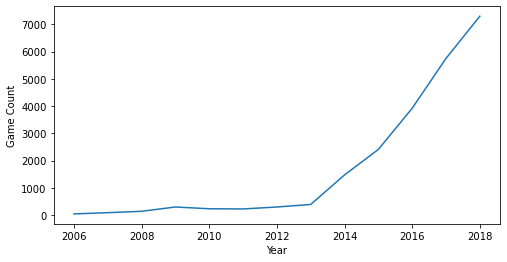

In [7]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Year', y='Game Count', data=df2)

After observing this visual of the amount of games released on Steam per year, we can see that it increases slowly up until 2013. After this point, the amount of games released skyrockets and breaks 7000 in 2018. This may have a great influence on the prices of games as gaming has become increasingly popular over the years as well. 

<AxesSubplot:xlabel='Year', ylabel='Average Price'>

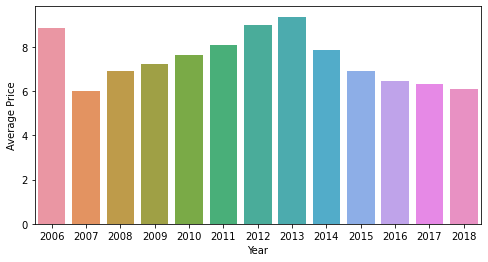

In [8]:
plt.figure(figsize=(8,4))
sns.barplot(x='Year', y='Average Price', data=df2)

As shown above, the average price of games each year do not go below 6 dollars and only goes past 9 dollars in 2013. The change in average prices does not seem like much but the average price in 2013 is 50% more than in 2007 which is a quite a substantial change. It is surprising that all the average prices are as low as they are considering many popular games are priced up to as much as 80 dollars. These low average prices hint that there must be many more cheap games compared to expensive ones. Something interesting about this graph is that the average price increases from 2007 until 2013 and then drops after that. After looking at the first graph, it is known that the amount of games released per year greatly increases after 2013 so there is possibly a correlation between the amount of games released and the average price from this point on.

<AxesSubplot:xlabel='Year', ylabel='Cheap Game Percent'>

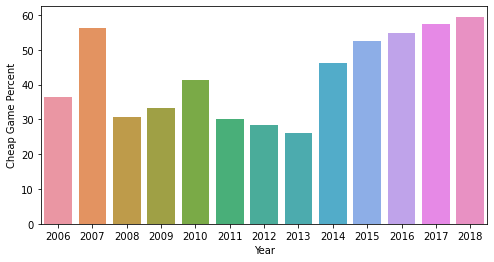

In [12]:
plt.figure(figsize=(8,4))
sns.barplot(x='Year', y='Cheap Game Percent', data=dfn)

This next graph shows that the pecentage of games that are cheap is inconsistent before 2013 and then continuously increases afterwards. This explains the decrease in the average prices from the previous graph as there are many more cheap games as the years go on which drops the average price.

<AxesSubplot:xlabel='release_date', ylabel='price'>

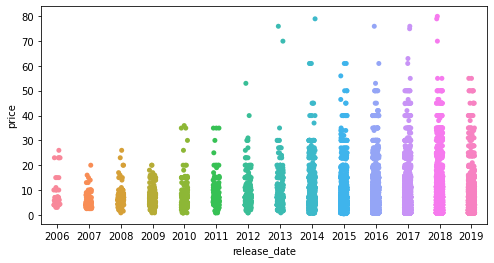

In [10]:
plt.figure(figsize=(8,4))
sns.stripplot(x='release_date', y='price', data=df1, jitter=True)

As the years progress, we can see that the amount of expensive games increases. Just by seeing this visual, it could be assumed that the average price of games increases over the years but this is not true due to the overwhelming amount of cheap games.

In conclusion, we can see some consistent changes after 2013 in the prices of games released on Steam. It is true that more games have become much more expensive as time has passed but the average prices are quite the opposite. There is a huge increase in the amount of games released each year and an even greater increase in the amount of cheap games which overwhelms the expensive games making the average price slightly lower.